Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Darina Petrova | 12230205 | 27.11.2023, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 4 &ndash; Logistic Regression as a Door Opener to Deep Learning</h2>

<b>Authors:</b> Brandstetter, Schäfl, Winter, Parada-Cabaleiro, Schörgenhumer<br>
<b>Date:</b> 13-11-2023

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u4_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u4_utils.py</code> need to be installed.

<div class="alert alert-warning">
    <b>Important:</b> When specifying a seed for the sources of randomness, use the <code>u4.set_seed(seed=XYZ)</code> function.
</div>

In [1]:
# Required packages and the u4_utils file
import u4_utils as u4
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from itertools import islice

# Set plotting style of seaborn related plots.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u4.setup_jupyter()

In [2]:
u4.check_module_versions()

Installed Python version: 3.10 (✓)
Installed numpy version: 1.25.2 (✓)
Installed pandas version: 2.0.3 (✓)
Installed scikit-learn version: 1.3.2 (✓)
Installed matplotlib version: 3.7.3 (✓)
Installed seaborn version: 0.12.2 (✓)
Installed scipy version: 1.11.3 (✓)
Installed torch version: 2.1.1+cu118 (✓)


<h2>Exercise 1</h2>

Given the dataset defined below, use the functions from <code>u4_utils.py</code> (according to the instructions given in the lecture notebook) to perform the following tasks:

<table>
    <tr>
        <th>Parameter</th>
        <th>Value (used in this notebook)</th>
        <th>Description</th>
    </tr>
    <tr>
        <td><code>num_pairs</code></td>
        <td>75</td>
        <td>amount of $(x, y)$ pairs to generate</td>
    </tr>
    <tr>
        <td><code>variance</code></td>
        <td>0.2</td>
        <td>variance within $y$ w.r.t. defining function</td>
    </tr>
</table>

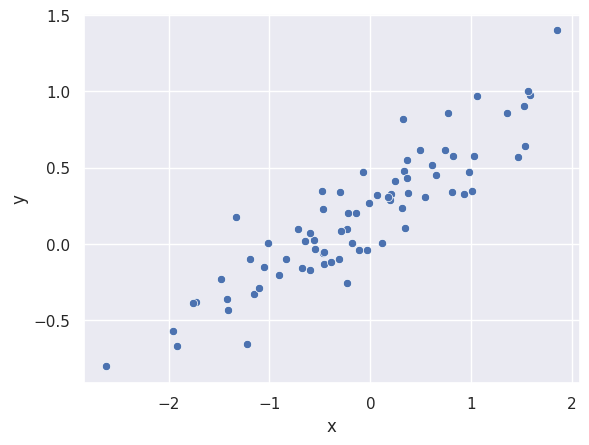

In [3]:
# Set seed for reproducibility.
u4.set_seed(seed=42)

# Create dataset consisting of random (x, y) pairs.
dataset = u4.get_dataset(
    num_pairs=75,
    variance=0.2
)

# Plot the dataset.
sns.scatterplot(data=dataset, x="x", y="y");

<div class="alert alert-warning">
    <b>Exercise 1.1. [4 Points]</b>
    <ul>
        <li>In order to find the <b>linear</b> model which best describes the given dataset, look for the optimal parameters $d$ and $k$ manually.</li>
        <li>Then, plot both the data pairs and the linear model (defined by your coefficients).</li>
        <li>For reproducibility, set a fixed seed (seed=42).</li>
    </ul>
</div>

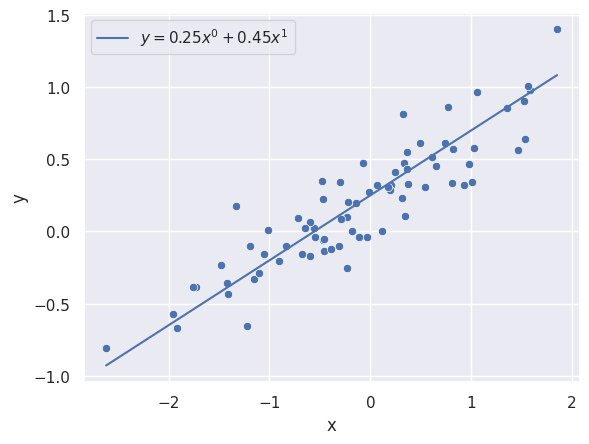

In [4]:
# your code goes here
u4.set_seed(seed=42)

coefficients = (
    0.25,  
    0.45
)

u4.plot_model(
    dataset=dataset,
    coefficients=coefficients
)

<div class="alert alert-warning">
    <b>Exercise 1.2. [2 Points]</b>
    <ul>
        <li>Perform the previous task but this time by setting the parameters "automatically", in a way that the <b>Mean Squared Error</b> between the linear model and the data pairs is minimized.</li>
        <li>Again, plot both the data pairs and the linear model.</li>
    </ul>
</div>

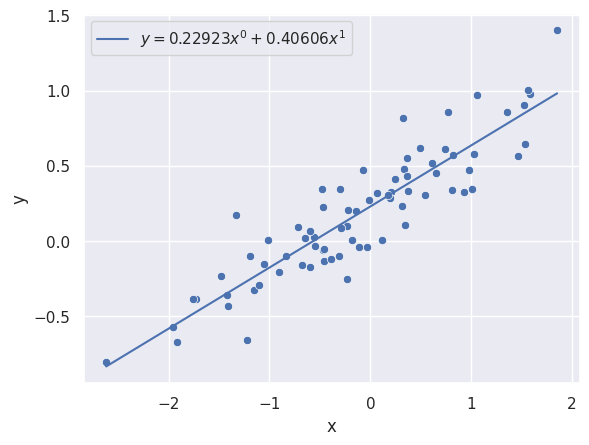

In [5]:
# your code goes here
u4.set_seed(seed=42)

coefficients = u4.minimize_mse(
    dataset=dataset,
    degree=1 
)

u4.plot_model(
    dataset=dataset,
    coefficients=coefficients
)

<div class="alert alert-warning">
    <b>Exercise 1.3. [2 Points]</b>
    <ul>
        <li>Assume that the automatically found parameter values differ from the true, underlying parameter values.</li>
        <li>Briefly describe at least two possible reasons for this behavior.</li>
    </ul>
</div>

In [6]:
# your answer goes here (you may use a markdown cell)
print('''
1. Underfitting - model complexity may be too low - we used a linear regression model (polynomial is of degree 1) and the correct model may need a higher degree, as the relationship between the points may not be linear.
2. Insufficient data - dataset too small or not representative enough - for example if the data is biased, or contains too much noise, it will create a naive model - which won't reflect the true relationship.
''')


1. Underfitting - model complexity may be too low - we used a linear regression model (polynomial is of degree 1) and the correct model may need a higher degree, as the relationship between the points may not be linear.
2. Insufficient data - dataset too small or not representative enough - for example if the data is biased, or contains too much noise, it will create a naive model - which won't reflect the true relationship.



<h2>Exercise 2</h2>

<div class="alert alert-warning">
    <b>Important:</b> For reproducibility, for each of the following tasks, set a fixed seed (seed=42).
</div>

<div class="alert alert-warning">
    <b>Exercise 2.1. [6 Points]</b>
    <ul>
        <li>Generate a new dataset considering the characteristics defined below and plot both the dataset and the underlying model.</li>
        <table>
            <tr>
                <th>Parameter</th>
                <th>Value (used in this notebook)</th>
                <th>Description</th>
            </tr>
            <tr>
                <td><code>num_pairs</code></td>
                <td>25</td>
                <td>amount of $(x, y)$ pairs to generate</td>
            </tr>
            <tr>
                <td><code>variance</code></td>
                <td>0.5</td>
                <td>variance within $y$ w.r.t. defining function</td>
            </tr>
            <tr>
                <td><code>coefficients</code></td>
                <td><code>np.random.rand(4)</code></td>
                <td>upper bound of random polynomial degree</td>
            </tr>
        </table>
        <li>When defining the dataset, pass the random coefficients for the underlying model via the parameter <code>coefficients</code>. Also make sure to use the same random coefficients for plotting.</li>
    </ul>
</div>

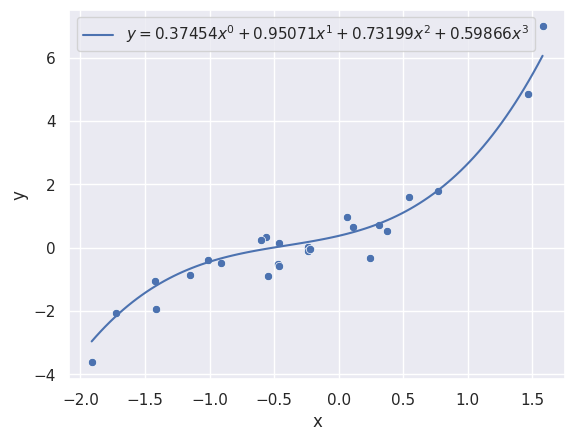

In [7]:
# your code goes here
u4.set_seed(seed=42)

rand_coefficients = np.random.rand(4)

dataset = u4.get_dataset(
    num_pairs=25,
    variance=0.5,
    coefficients = rand_coefficients
)

u4.plot_model(
    dataset=dataset,
    coefficients=rand_coefficients
)

<div class="alert alert-warning">
    <b>Exercise 2.2. [6 Points]</b>
    <ul>
        <li>Define a model by "automatically" retrieving the optimal coefficients which minimize the MSE.</li>
        <li>Then, print out the optimal coefficients and plot both the data pairs and the optimized model.</li>
    </ul>
</div>

List of optimal coefficients: [0.22025178899500997, 0.9524286599766312, 0.8272186658391796, 0.6825960453405266]


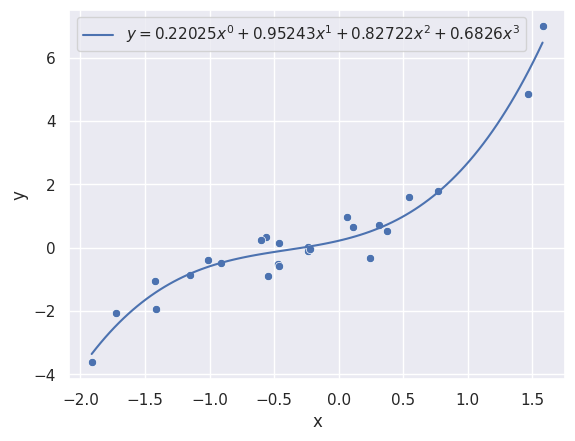

In [8]:
# your code goes here
u4.set_seed(seed=42)

opt_coefficients = u4.minimize_mse(
    dataset=dataset,
    degree=3
)

print(f'List of optimal coefficients: {opt_coefficients}')

u4.plot_model(
    dataset=dataset,
    coefficients=opt_coefficients
)

<div class="alert alert-warning">
    <b>Exercise 2.3. [4 Points]</b>
    <ul>
        <li>Compute and print out the difference between the random coefficients from the underlying model (used to generate the dataset) and the optimal coefficients ("automatically" computed) which minimize the MSE.</li>
    </ul>
</div>

In [9]:
# your code goes here
u4.set_seed(seed=42)

for i,val in enumerate(rand_coefficients):
    print(f'Difference for x degree {i} is {abs(val - opt_coefficients[i])}')

Difference for x degree 0 is 0.15428832985235252
Difference for x degree 1 is 0.00171435356671501
Difference for x degree 2 is 0.09522472402777449
Difference for x degree 3 is 0.08393756114349005


<div class="alert alert-warning">
    <b>Exercise 2.4. [1 Points]</b>
    <ul>
        <li>Visually inspect the previous plot and keep the (possible) differences in parameter values in mind, which regions are especially prone to high errors?</li>
        <li>Please keep in mind that "prone to" does not automatically and always imply "guaranteed to".</li>
        <li>You do not need to set a seed for this task.</li>
    </ul>
</div>

In [10]:
# your code goes here (you may use a markdown cell)
print(''' 
The sparse points nearest the origin (bottom left corner) - the x^0 coeffient adjusts the baseline, so finds a new 'starting point'.
Also the regions with high localized variance, there could be a lot of noise and misclassification.
''')

 
The sparse points nearest the origin (bottom left corner) - the x^0 coeffient adjusts the baseline, so finds a new 'starting point'.
Also the regions with high localized variance, there could be a lot of noise and misclassification.



<h2>Exercise 3</h2>

In this exercise, we will consider that $y$ is a binary variable, i.e., the label of each data point is either 0 or 1. Under this premise, we will create a new dataset.

<div class="alert alert-warning">
    <b>Exercise 3.1. [5 Points]</b>
    <ul>
        <li>Following the lecture notebook, choose the correct function from <code>u4_utils.py</code> to generate a dataset with binary labels consisting of 25 data pairs (feature, label). Then, plot it.</li>
        <li>For reproducibility, choose a fixed random seed of seed=27.</li>
    </ul>
</div>

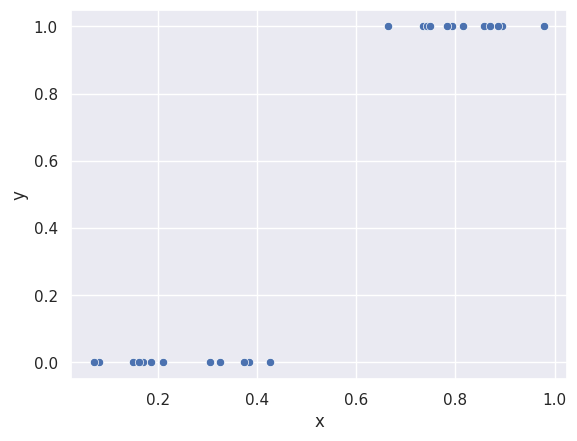

In [11]:
# your code goes here
u4.set_seed(seed=27)

dataset = u4.get_dataset_logistic(
    num_pairs=25
)

sns.scatterplot(data=dataset, x="x", y="y");

<div class="alert alert-warning">
    <b>Exercise 3.2. [5 Points]</b>
    <ul>
        <li>Use the corresponding function in <code>u4_utils.py</code> to minimize the cross entropy loss and choose the combination of hyperparameters that enables the logistic regression model to best separate the two classes.</li>
        <li>Then, plot the dataset and the logistic regression model. Retrieve the optimal combination by taking the following values for each hyperparameter into account:</li>
        <table style="text-align:center;vertical-align:middle">
            <th>Hyperparameter</th>
            <th>Values</th>
            <tr>
                <td><code>iterations</code></td>
                <td>10, 100</td>
            </tr>
            <tr>
                <td><code>learning_rate</code></td>
                <td>1, 10.0, 100.0</td>
            </tr>
            <tr>
                <td><code>momentum</code></td>
                <td>0.3, 0.9</td>
            </tr>
        </table>
        <li>For determining the best hyperparameters in this example, it is enough to simply look at the resulting model plot, i.e., you do not have to make any computations, a visual check is sufficient.</li>
    </ul>
</div>

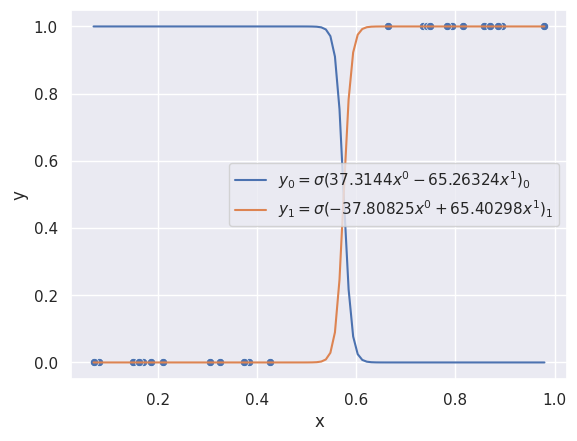

In [12]:
# your code goes here
u4.set_seed(seed=27)

coefficients = u4.minimize_ce(
    dataset=dataset,
    iterations=100,
    learning_rate=100.0,
    momentum=0.3
)

u4.plot_logistic_model(
    dataset=dataset,
    coefficients=coefficients
)

<h2>Exercise 4</h2>

Considering again a binary classification problem, we will now workwith the <code>DataSet_LR_a.csv</code> (same as in the lecture notebook).

<div class="alert alert-warning">
    <b>Exercise 4.1. [5 Points]</b>
    <ul>
        <li>Load and process the dataset as shown in the lecture notebook but this time considering 75% (parameter <code>frac</code>) of the samples for training and 25% for testing.</li>
        <li>For reproducibility, set a seed=42.</li>
    </ul>
</div>

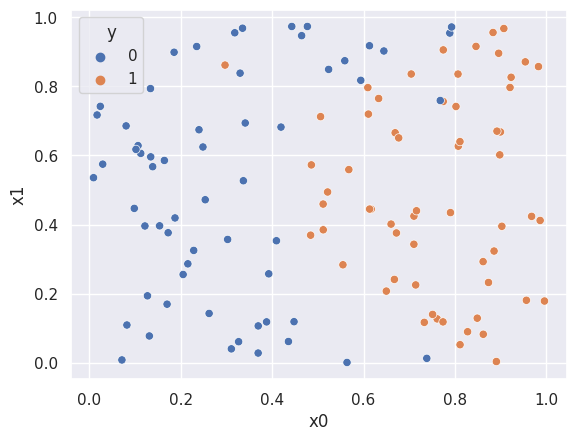

In [13]:
# your code goes here
u4.set_seed(seed=42)

dataset = u4.get_dataset_from_csv(path='resources/DataSet_LR_a.csv')

sns.scatterplot(data=dataset, x="x0", y="x1", hue="y")

dataset_train = dataset.sample(frac=0.75, replace=False, axis=0)
dataset_test = dataset.drop(dataset_train.index)

<div class="alert alert-warning">
    <b>Exercise 4.2. [8 Points]</b>
    <ul>
        <li>Considering <code>iterations=1000</code> and <code>momentum=0.9</code> and by using the function to minimize the cross entropy loss, find a learning rate that enables the logistic regression model to achieve an accuracy on the <b>test set</b> higher than 88%.</li>
        <li>Print out the model's accuracy.</li>
        <li>For reproducibility, set a seed=42.</li>
    </ul>
</div>

In [14]:
# your code goes here
u4.set_seed(seed=42)

coefficients = u4.minimize_ce(
    dataset=dataset_train,
    iterations=1000,
    learning_rate=10,
    momentum=0.9
)

predictions = u4.predict_logistic(dataset_test.drop(columns="y"), coefficients)
accuracy_test = (predictions == dataset_test["y"]).mean()
print(f'Model accuracy on test set: {accuracy_test}')

Model accuracy on test set: 0.9


<div class="alert alert-warning">
    <b>Exercise 4.3. [6 Points]</b>
    <ul>
        <li>Plot the 2D test dataset, once showing the true, actual labels (ground truth) and once showing the predicted labels.
        <li>You need to draw the plots in two rows and one coloum.</span></li>
</li>
    </ul>
</div>

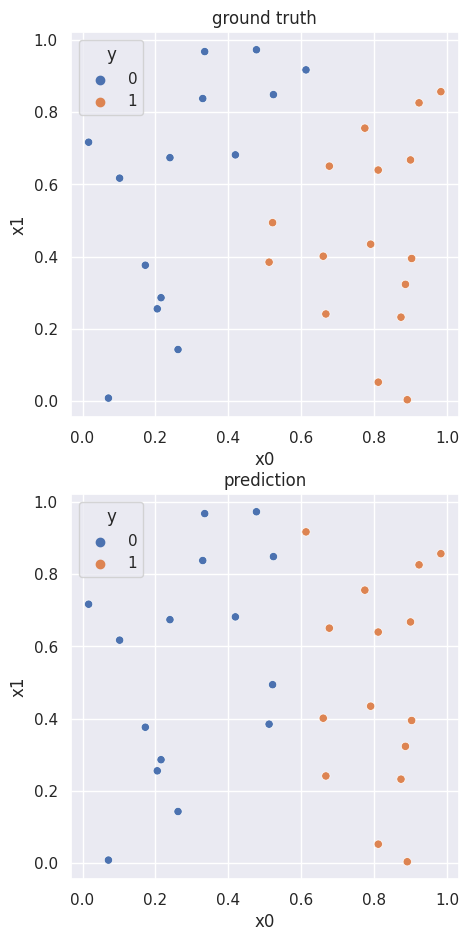

In [15]:
# your code goes here
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 11)) #changed the figsize, because it looked bad with what was given in the U4 notebook for 2 columns 1 row

axes[0].set_title("ground truth")
sns.scatterplot(data=dataset_test, x="x0", y="x1", hue="y", ax=axes[0])

axes[1].set_title("prediction")
sns.scatterplot(data=dataset_test.assign(y=predictions), x="x0", y="x1", hue="y", ax=axes[1])
plt.show()

<h2>Exercise 5</h2>

Considering the framework PyTorch and the instructions given in the lecture notebook, perform the following tasks:

<div class="alert alert-warning">
    <b>Exercise 5.1. [5 Points]</b>
    <ul>
        <li>Generate a tensor of 2 dimensions with a shape of 2 x 7, containing random numbers from a standard normal distribution with (mean=0 and stddev=variance=1).</li>
        <li>Print out the tensor and its shape to be sure that your answer is correct.</li>
        <li>For reproducibility, set seed=42.</li>
    </ul>
</div>

In [16]:
# your code goes here
u4.set_seed(seed=42)

x = torch.rand(2,7)
print(x)
print(x.shape)

tensor([[0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566],
        [0.7936, 0.9408, 0.1332, 0.9346, 0.5936, 0.8694, 0.5677]])
torch.Size([2, 7])


<div class="alert alert-warning">
    <b>Exercise 5.2. [5 Points]</b>
    <ul>
        <li>Implement the function $g\left(x\right) = 5\cdot{}{x}^2 + 7\cdot{}{x}$ related to the previously generated tensor using PyTorch.</li>
        <li>Print the output of the function considering as input the tensor you have created in the first task of this exercise.</li>
    </ul>
</div>

In [17]:
# your code goes here
def g(x: torch.Tensor) -> torch.Tensor:
    return (5 * x**2) + (7 * x)
y = g(x)

y_for_print = y.ravel()
x_for_print = x.ravel()

for i,val in enumerate(y_for_print):
    print(f'g(x) output for x = {x_for_print[i]:.4f} is {val:.4f}')

g(x) output for x = 0.8823 is 10.0679
g(x) output for x = 0.9150 is 10.5912
g(x) output for x = 0.3829 is 3.4130
g(x) output for x = 0.9593 is 11.3165
g(x) output for x = 0.3904 is 3.4954
g(x) output for x = 0.6009 is 6.0116
g(x) output for x = 0.2566 is 2.1252
g(x) output for x = 0.7936 is 8.7048
g(x) output for x = 0.9408 is 11.0107
g(x) output for x = 0.1332 is 1.0210
g(x) output for x = 0.9346 is 10.9096
g(x) output for x = 0.5936 is 5.9167
g(x) output for x = 0.8694 is 9.8652
g(x) output for x = 0.5677 is 5.5855


<div class="alert alert-warning">
    <b>Exercise 5.3. [5 Points]</b>
    <ul>
        <li>Compute the gradient of the previously defined function $g\left(x\right)$ for $x = 0.5$ using the automatic differentiation functionality of PyTorch.</li>
        <li>Following the lecture notebook, print $x$ as a tensor, the output of the function $g(x)$, and the gradient $g'(x)$.</li>
    </ul>
</div>

In [18]:
# your code goes here
x = torch.tensor([0.5], requires_grad=True)
print(f'x     = {x.item()}')

y = g(x)
print(f'g(x)  = {y.item()}')

dy = torch.autograd.grad(y, x)
print(f"g'(x) = {dy[0].item()}")

x     = 0.5
g(x)  = 4.75
g'(x) = 12.0


<h2>Exercise 6</h2>

With the FashionMNIST dataset, perform the following tasks:

<div class="alert alert-warning">
    <b>Important:</b> For reproducibility, for each of the following tasks, set a fixed seed (seed=27).
</div>

<div class="alert alert-warning">
    <b>Exercise 6.1. [3 Points]</b>
    <ul>
        <li>Set the following hyperparameters (hint: <code>epochs</code> is the same as <code>iterations</code>):</li>
    </ul>

Hyperparameter | Value
:--- | :---
`batch_size` | 9
`epochs` | 1
`learning_rate` | 1e-2
`momentum` | 7e-1
</div>

In [19]:
# your code goes here
u4.set_seed(seed=27)

from types import SimpleNamespace #it was imported in the U4 notebook, I assumed I can do the same here

hyperparameters = SimpleNamespace(
    batch_size=9,
    epochs=1,
    learning_rate=1e-2,
    momentum=7e-1
)

<div class="alert alert-warning">
    <b>Exercise 6.2. [5 Points]</b>
    <ul>
        <li>Get the data loaders for the training and test <b>FashionMNIST</b> data (<code>u4.get_dataset_fashionmnist()</code>). Fetch the samples and targets.</li>
        <li>Display the numbers of training and test samples.</li>
    </ul>
</div>

In [20]:
# your code goes here
u4.set_seed(seed=27)

train_loader, test_loader = u4.get_dataset_fashionmnist(
    batch_size=hyperparameters.batch_size
)

print(f'Amount of training samples: {len(train_loader.dataset)}')
print(f'Amount of test samples: {len(test_loader.dataset)}')

Amount of training samples: 60000
Amount of test samples: 10000


<div class="alert alert-warning">
    <b>Exercise 6.3. [3 Points]</b>
    <ul>
        <li>Display the first 10 samples of test dataset and thier corresponding labels.</li>
    </ul>
</div>

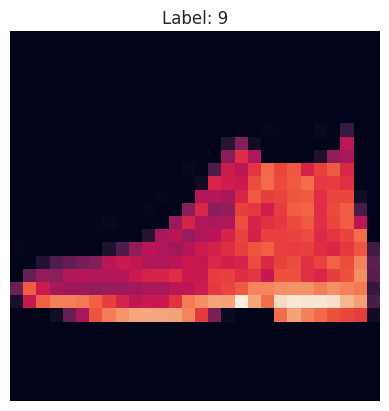

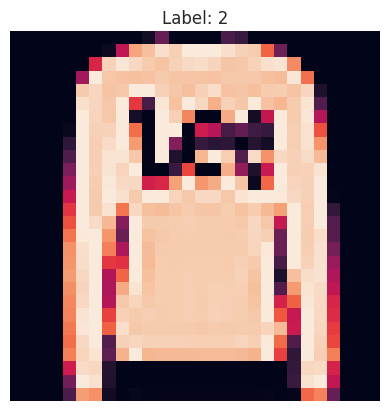

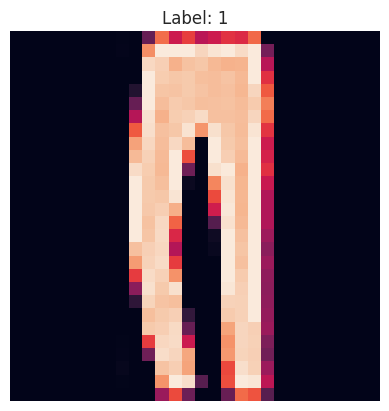

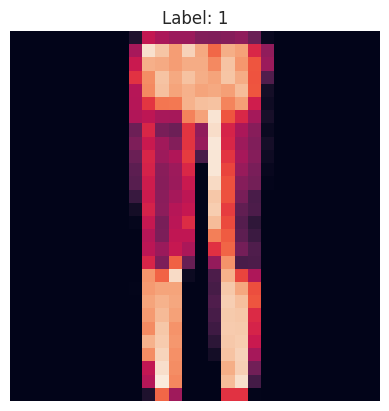

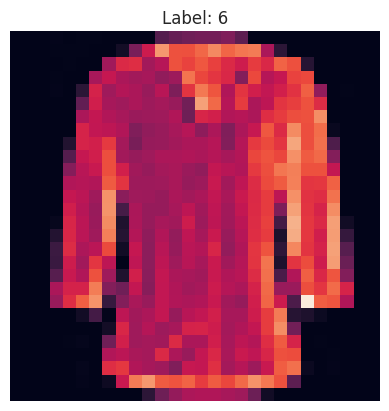

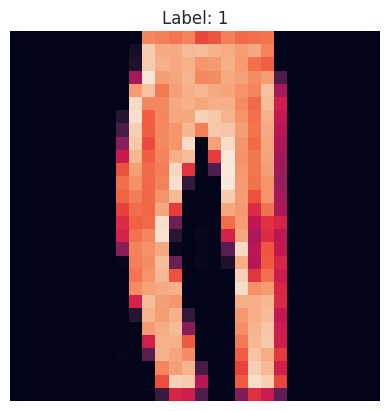

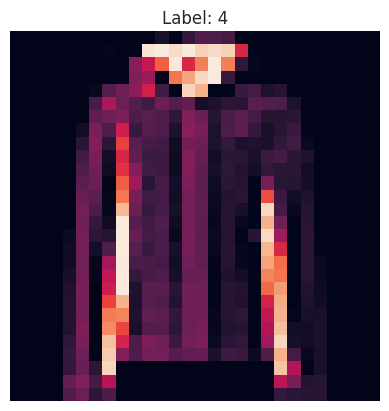

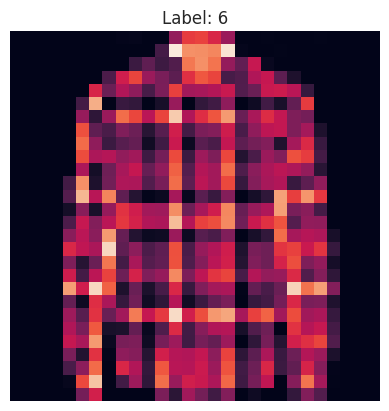

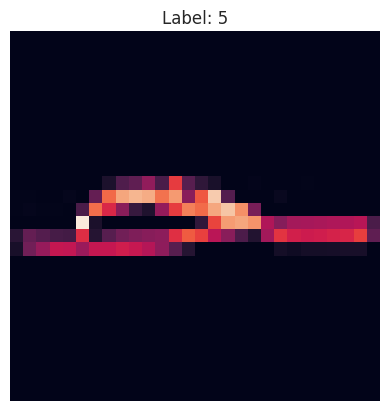

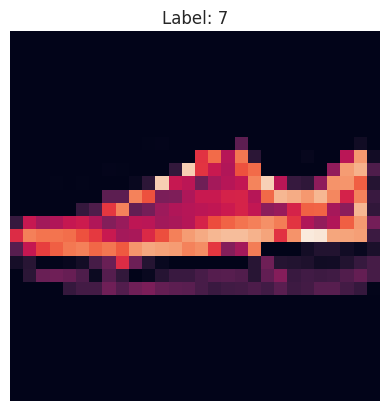

In [21]:
# your code goes here
displayed_samples = 0

for images, labels in islice(test_loader, 2):
    for i in range(len(images)):
        plt.imshow(images[i].squeeze()) #I didn't know if we were supposed to use a gray colormap, like in the notebook, so I didn't, but if so it would be plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i].item()}')
        plt.axis(False)
        plt.show()

        displayed_samples += 1

        if displayed_samples == 10:
            break


<div class="alert alert-warning">
    <b>Exercise 6.4. [3 Points]</b>
    <ul>
        <li>Display the fifth batch of training data and drop the labels (keep only the images themselves).</li>
    </ul>
</div>

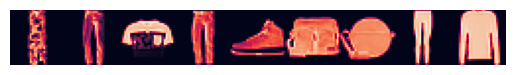

In [22]:
# your code goes here
u4.set_seed(seed=27)

images = next(islice(train_loader, 4, 5))[0]
images = np.concatenate([img.squeeze() for img in images], axis=1)
plt.imshow(images) # again can be made grayscale with cmap='gray', didn't know if we were supposed to
plt.axis(False)
plt.show()

<div class="alert alert-warning">
    <b>Exercise 6.5. [5 Points]</b>
    <ul>
        <li>Minimize the cross entropy loss using the training data to get the coefficients of the logistic model.</li>
        <li>Get the predictions for the test data using this model and print the accuracy on the test set.</li>
    </ul>
</div>

In [23]:
# your code goes here
u4.set_seed(seed=27)

coefficients = u4.minimize_ce(
    dataset=train_loader,
    iterations=hyperparameters.epochs,
    learning_rate=hyperparameters.learning_rate,
    momentum=hyperparameters.momentum
)

samples = torch.stack([x for x, y in test_loader.dataset]).flatten(start_dim=1)
targets = test_loader.dataset.targets

predictions = u4.predict_logistic(samples, coefficients)

accuracy_test = (predictions == targets.numpy()).mean()
print(f"Accuracy on test set: {accuracy_test:.4f}")

Accuracy on test set: 0.8234


<div class="alert alert-warning">
    <b>Exercise 6.6. [12 Points]</b>
    <ul>
        <li>Keeping <code>batch_size=9</code> and <code>epochs=1</code>, optimize the other two hyperparameters <code>learning_rate</code> and/or <code>momentum</code> in a way that you achieve a better performance (accuracy).</li>
        <li>You need to sort the values in ascending order based on the accuracy. Then, print out the results.</li>
        <li>Hint: You might consider some of the concepts learned in the previous units to automatize this process.</li>
        <li>Hint: Do not forget to set the seed if you want reproducible and comparable results.</li>
    </ul>
</div>

In [24]:
# your code goes here
u4.set_seed(seed=27)

learning_rates =  [1e-4, 1e-3, 1e-1] 
momentums = [3e-1, 6e-1]
results = []

for l_rate in learning_rates:
    for mom in momentums:
        coefficients = u4.minimize_ce(
            dataset=train_loader,
            iterations=hyperparameters.epochs,
            learning_rate= l_rate,
            momentum= mom
        )
        
        samples = torch.stack([x for x, y in test_loader.dataset]).flatten(start_dim=1)
        targets = test_loader.dataset.targets
        
        predictions = u4.predict_logistic(samples, coefficients)
        accuracy_test = (predictions == targets.numpy()).mean()

        results.append((accuracy_test, l_rate, mom))

sorted_results = sorted(results)

for accuracy_test, l_rate, mom in sorted_results:
    print(f"Accuracy on test set: {accuracy_test:.4f} for learning rate = {l_rate} and momentum = {mom}")

Accuracy on test set: 0.7569 for learning rate = 0.0001 and momentum = 0.3
Accuracy on test set: 0.7599 for learning rate = 0.1 and momentum = 0.3
Accuracy on test set: 0.7778 for learning rate = 0.1 and momentum = 0.6
Accuracy on test set: 0.7879 for learning rate = 0.0001 and momentum = 0.6
Accuracy on test set: 0.8195 for learning rate = 0.001 and momentum = 0.3
Accuracy on test set: 0.8272 for learning rate = 0.001 and momentum = 0.6
